In [1]:
%matplotlib notebook
import numpy as np
import os
import matplotlib.pyplot as plt
import batman
import random
from astropy.io import ascii

In [2]:
Path1 = os.path.join('..', 'Occurrence_rates', 'norm_rates_FGK.csv')
table = ascii.read(Path1, format='csv', header_start=0, data_start=1)
occ = np.array(table['f'], dtype=float)
radbinlower = np.array(table['rmin'], dtype=float)
radbinupper = np.array(table['rmax'], dtype=float)
pbinlower = np.array(table['pmin'], dtype=float)
pbinupper = np.array(table['pmax'], dtype=float)

In [3]:
def planetmaker(number, rates, radius_low, radius_up, period_low, period_up):
    '''Generates parameters for a given number of planets in a planetary system from occurence rates'''
    rowdex = np.arange(len(rates))
    cosi = np.random.random_sample()
    anglew = np.random.uniform(low=-180., high=180., size=number)
    e = np.random.beta(a=1.03, b=13.6, size=number)
    rows = np.random.choice(rowdex, p=rates, size=number)
    radp = np.random.uniform(low=radius_low[rows], high=radius_up[rows], size=number)
    per = np.random.uniform(low=period_low[rows], high=period_up[rows], size=number)
    return radp, per, cosi, anglew, e

In [4]:
radii, periods, incs, peris, eccs = planetmaker(100000, occ, radbinlower, radbinupper, pbinlower, pbinupper)

<IPython.core.display.Javascript object>


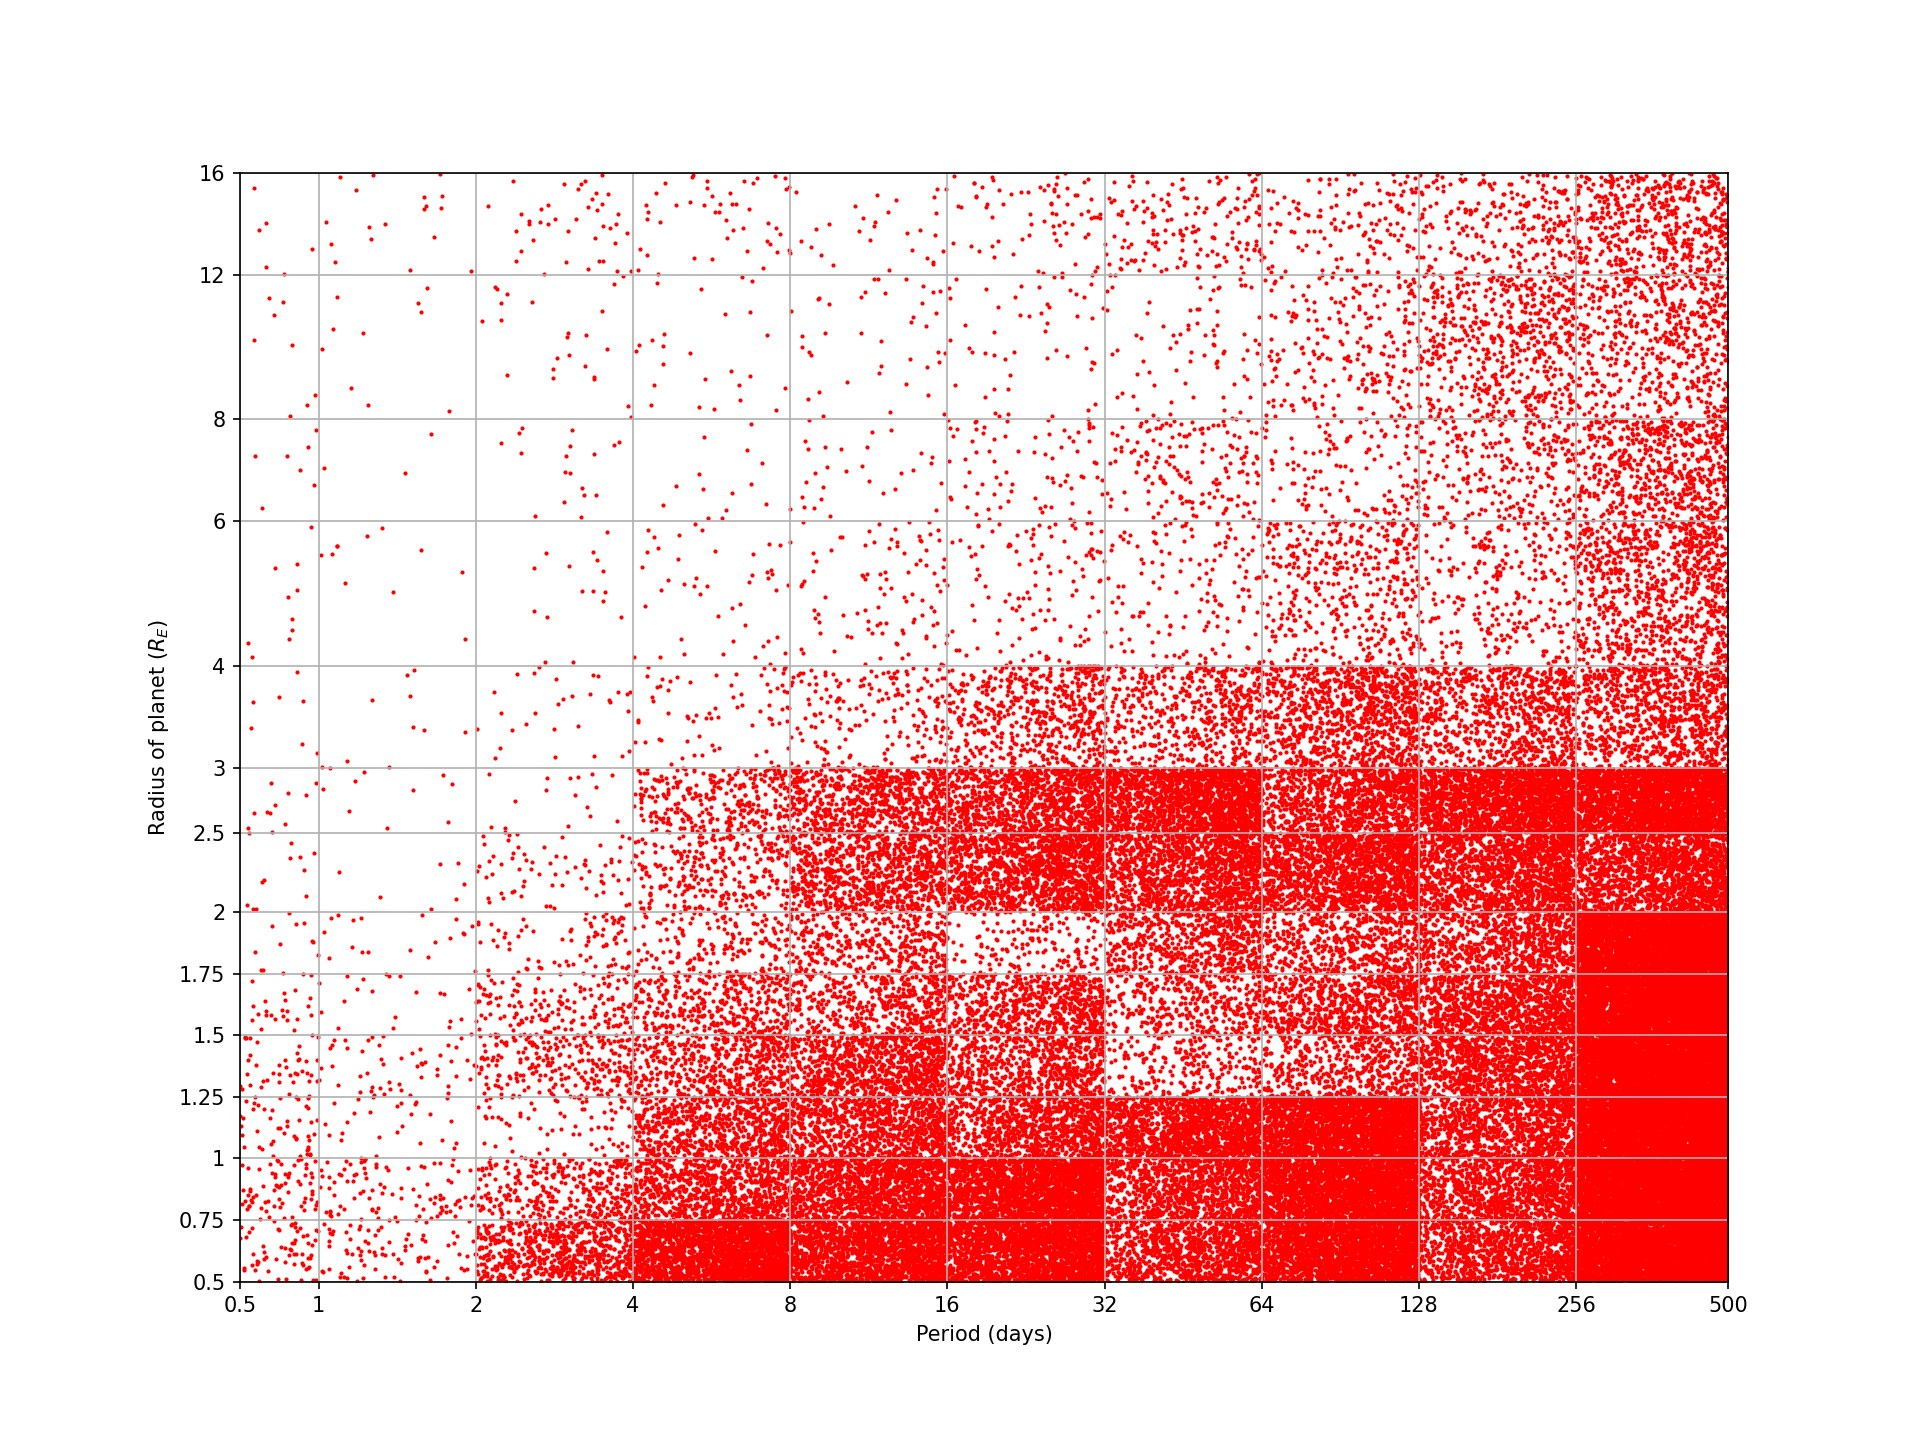

In [5]:
#Log-Log plot for visual comparison with Hsu_2019 distribution (shown below)
fig = plt.figure(figsize=[12.8, 9.6])
plt.xscale('symlog', base=2)
plt.yscale('symlog', base=2)
plt.scatter(periods, radii, s=1, c='#FF0000')
plt.xlabel('Period (days)')
plt.xlim(0.5, 500)
plt.ylim(0.5, 16)
plt.ylabel('Radius of planet ($R_E$)')
plt.xticks([0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 500], [0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 500])
plt.yticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 4, 6, 8, 12, 16], [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 4, 6, 8, 12, 16])
plt.grid()
plt.show()

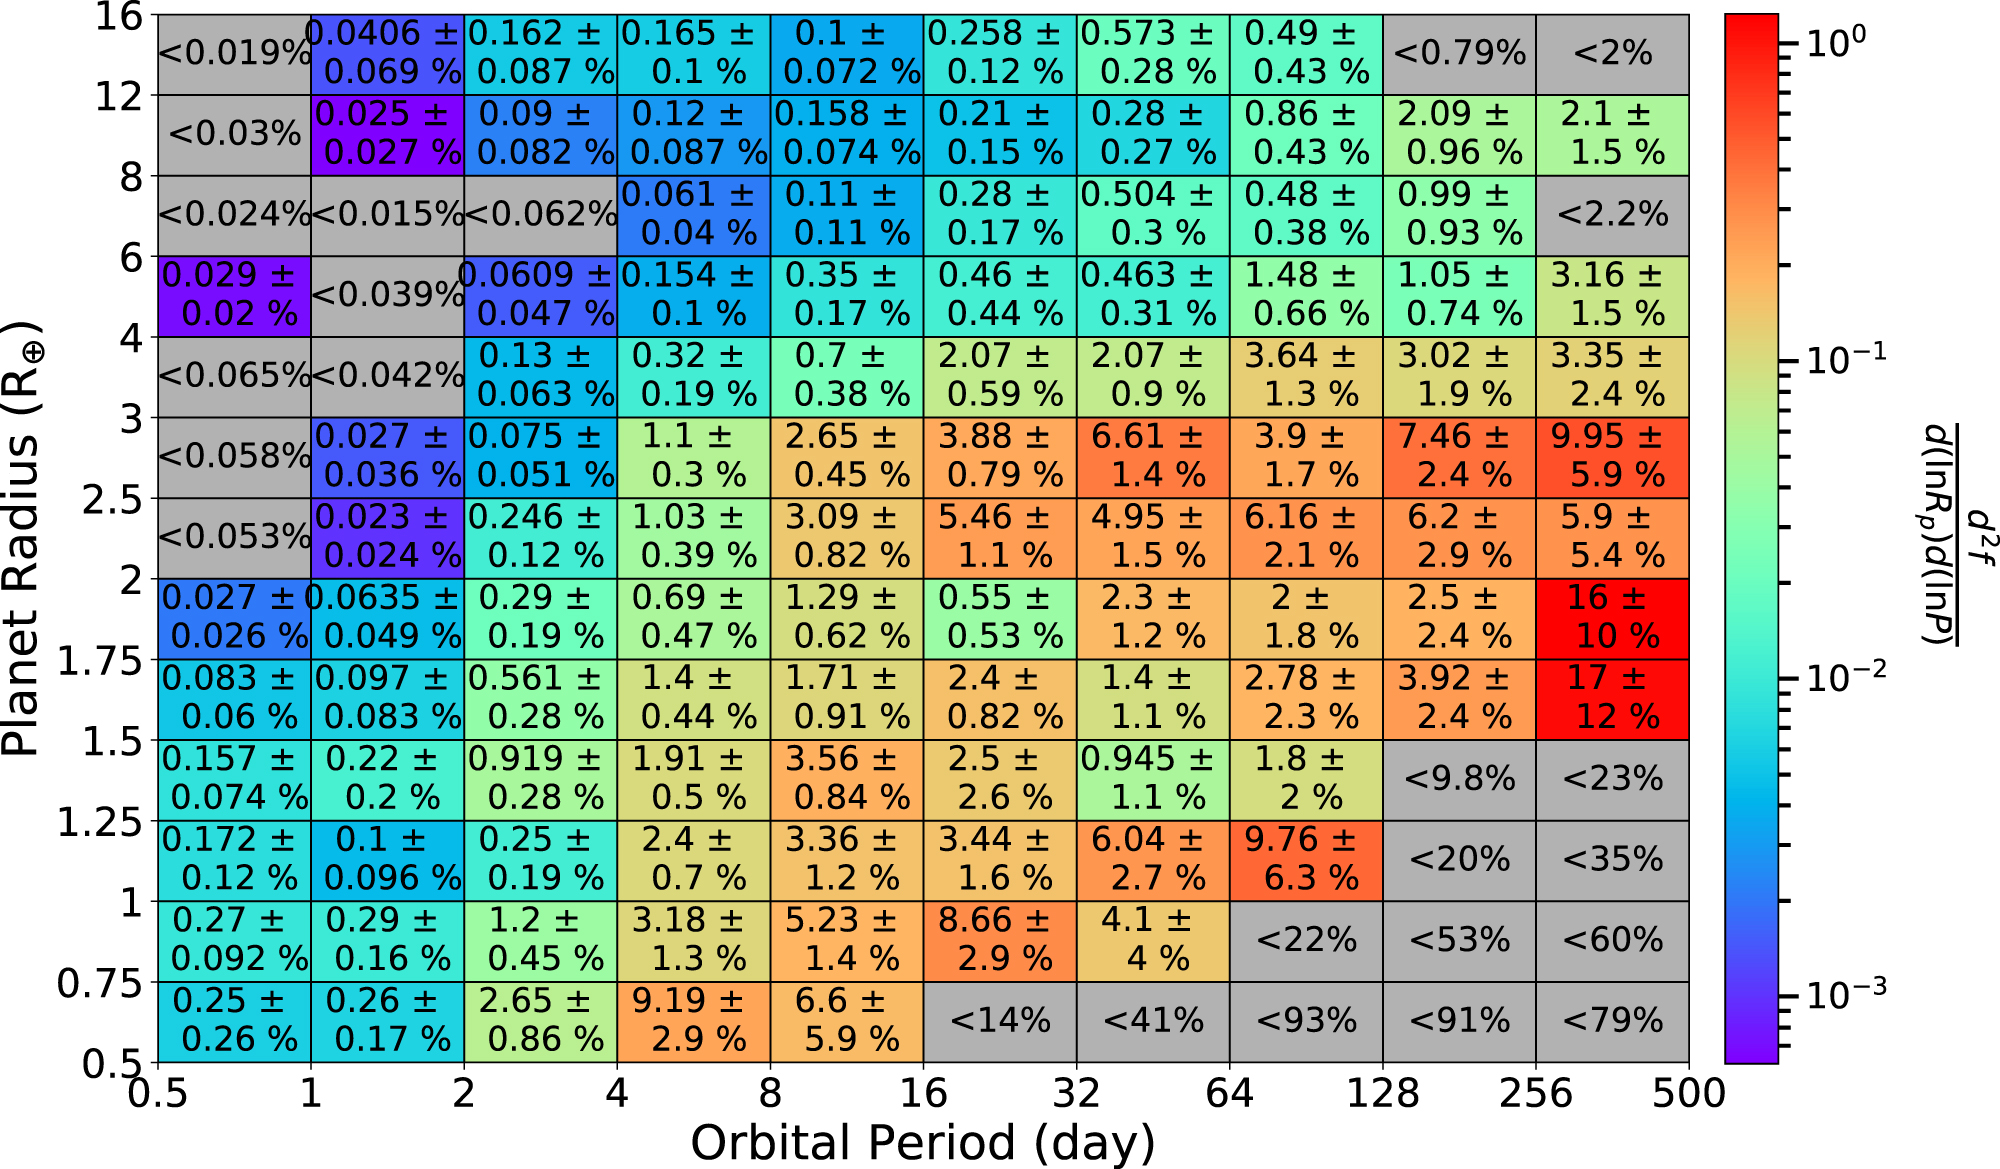

<IPython.core.display.Javascript object>


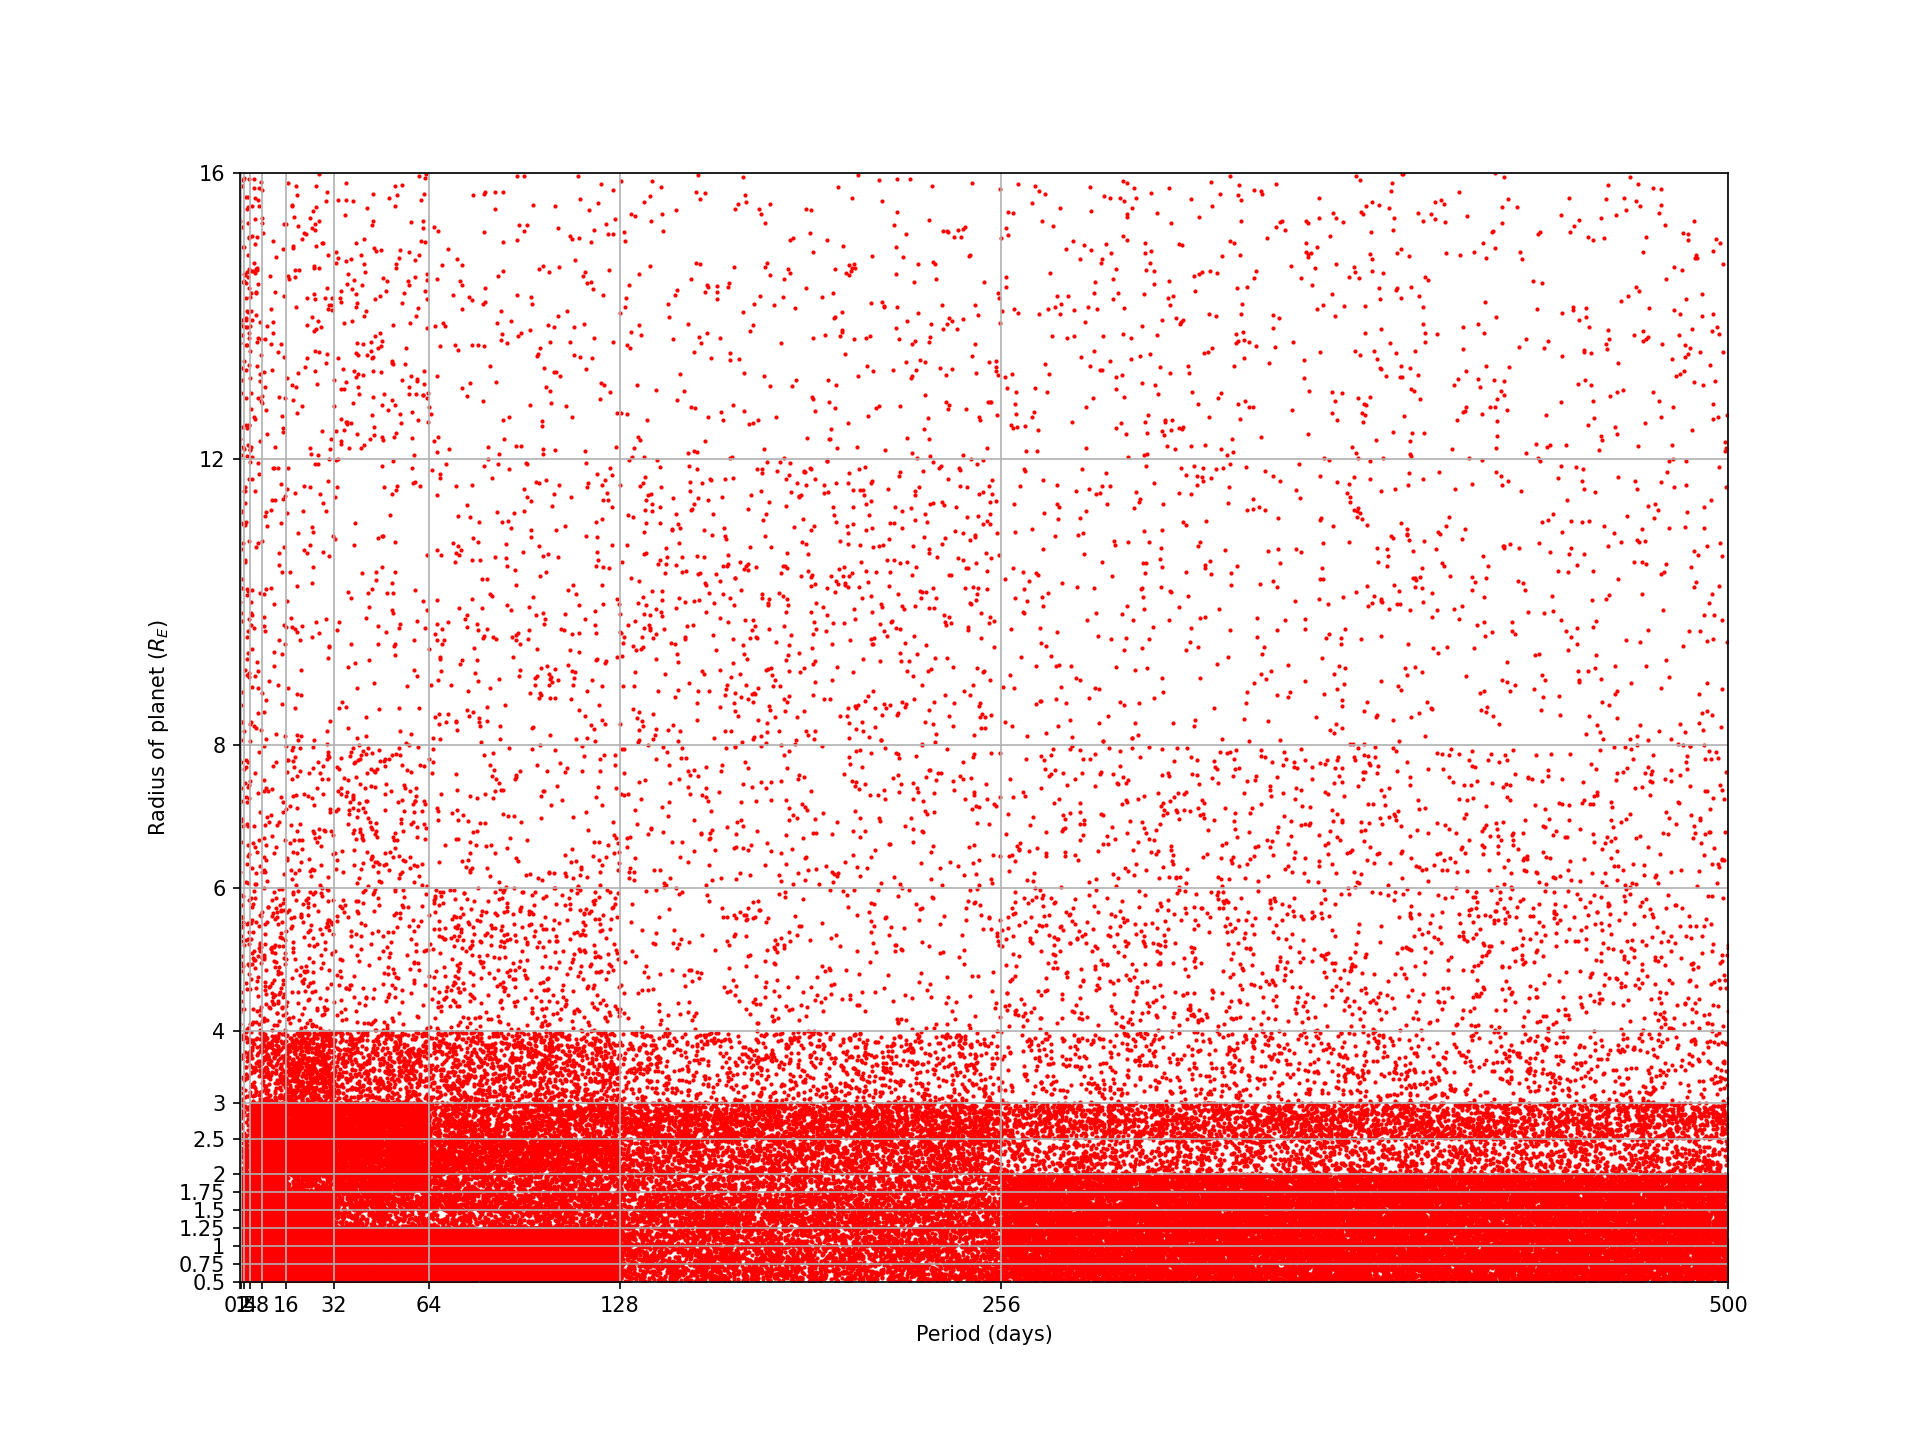

In [6]:
#Non-Logscale plot to check for differences within bins
fig = plt.figure(figsize=[12.8, 9.6])
plt.scatter(periods, radii, s=1, c='#FF0000')
plt.xlabel('Period (days)')
plt.ylabel('Radius of planet ($R_E$)')
plt.xticks([0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 500], [0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 500])
plt.yticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 4, 6, 8, 12, 16], [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 4, 6, 8, 12, 16])
plt.xlim(0.5,500)
plt.ylim(0.5,16)
plt.grid()
plt.show()